longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       5
dtype: int64


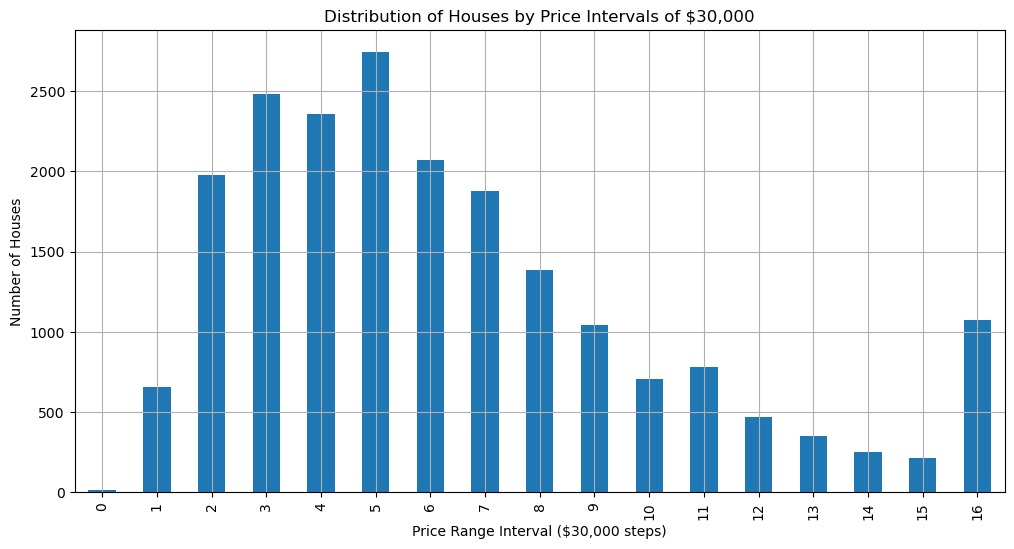

Updated CSV file saved to: housing_updated.csv


In [18]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Load the data
housing = pd.read_csv('housing.csv')

# Step 3: Drop rows with null values
housing = housing.dropna()


# Step 4: Encode 'ocean_proximity'
ocean_proximity_mapping = {
    '<1H OCEAN': 3,
    'NEAR OCEAN': 2,
    'NEAR BAY': 1,
    'INLAND': 0
}
housing['ocean_proximity'] = housing['ocean_proximity'].map(ocean_proximity_mapping)

# Step 5: Divide 'median_house_value' into intervals of $30,000
# Determine the max value to cover all price ranges
max_value = housing['median_house_value'].max()
bins = np.arange(0, max_value + 30000, 30000)

# Assign price range based on these bins
housing['price_range'] = pd.cut(housing['median_house_value'], bins=bins, labels=False, right=False)

housing = housing.drop(columns=['median_house_value'])

# Step 6: Save the updated data to a new CSV
output_path = 'housing_updated.csv'
housing.to_csv(output_path, index=False)

housing = pd.read_csv('housing_updated.csv')

# Step 1: Features (remove target)
X = housing.drop(columns=['price_range'])

# Check missing values
print(X.isnull().sum())

# Drop rows with missing values if any
X = X.dropna()

# Step 7: Visualization: Distribution of price ranges
plt.figure(figsize=(12,6))
housing['price_range'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Price Range Interval ($30,000 steps)')
plt.ylabel('Number of Houses')
plt.title('Distribution of Houses by Price Intervals of $30,000')
plt.grid(True)
plt.show()

# Output file path
print(f"Updated CSV file saved to: {output_path}")


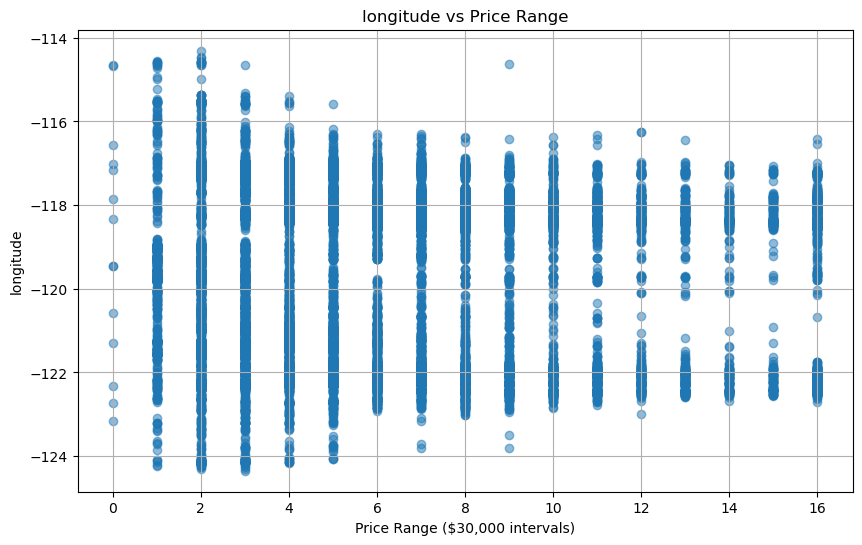

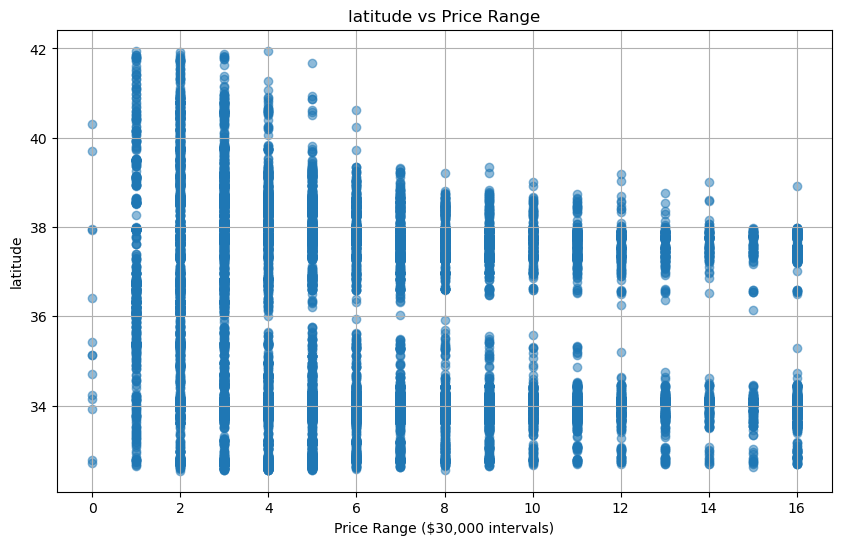

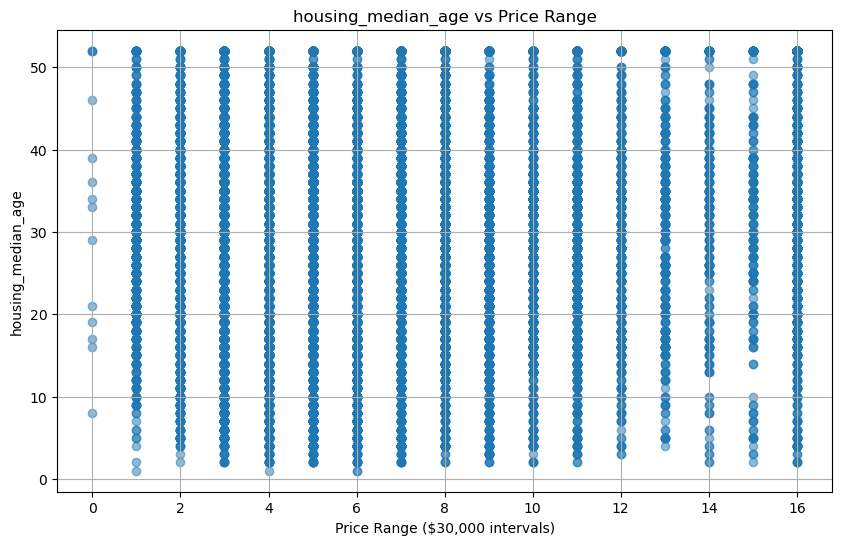

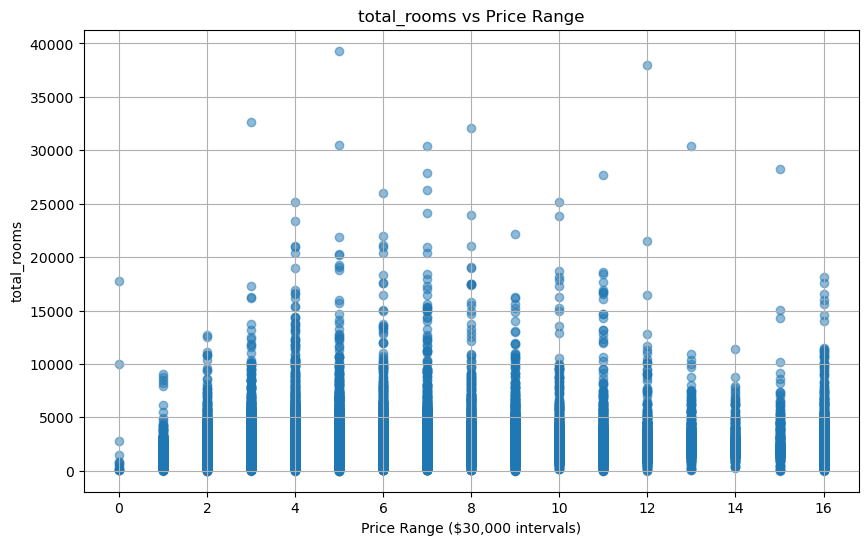

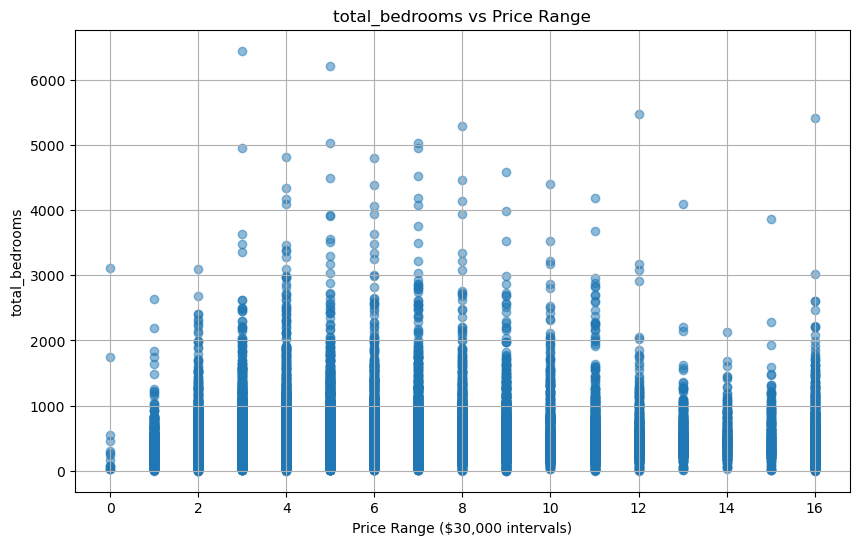

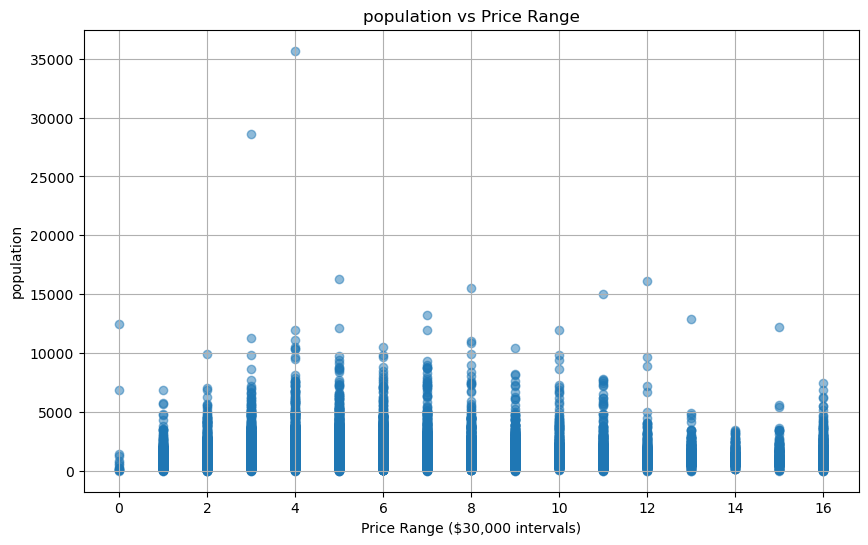

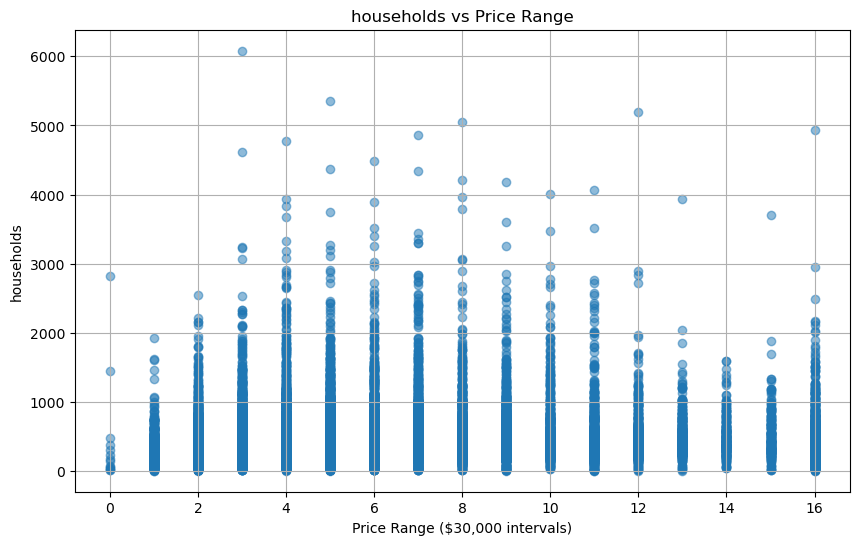

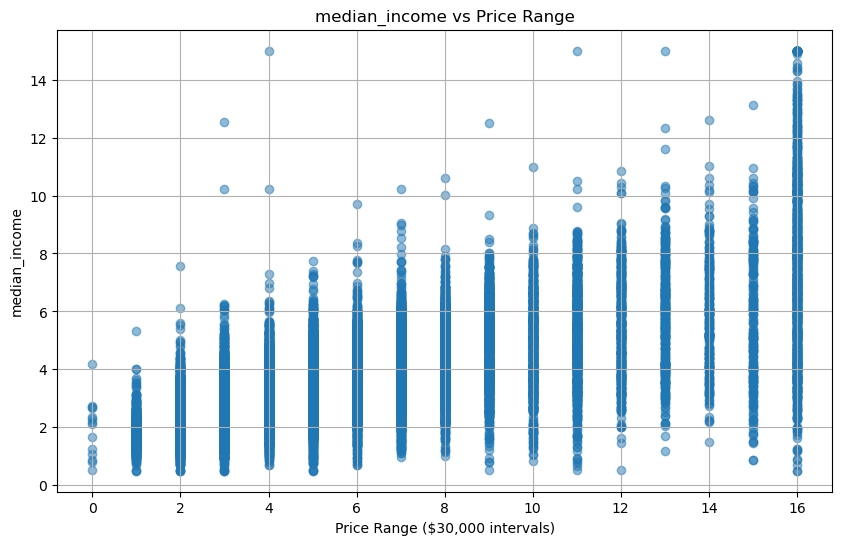

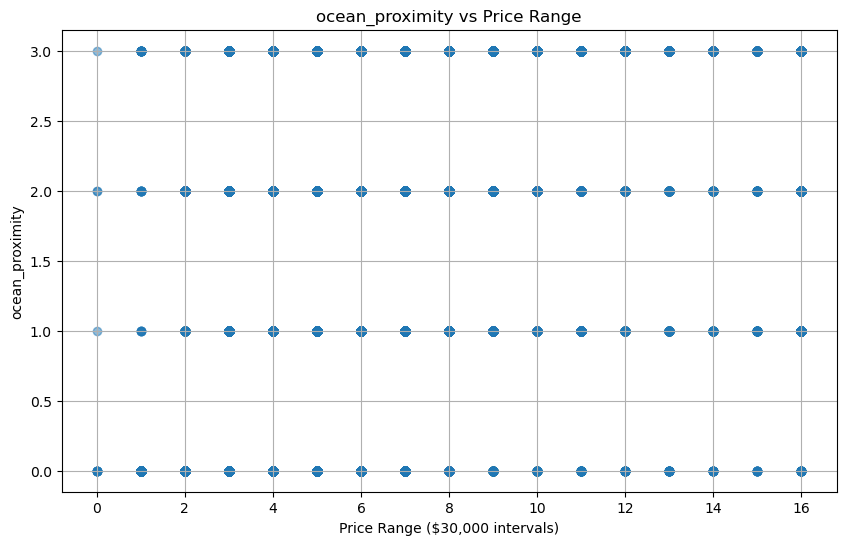

In [19]:
features = housing.columns.drop('price_range')  # all features except target

# Plot
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(housing['price_range'], housing[feature], alpha=0.5)
    plt.xlabel('Price Range ($30,000 intervals)')
    plt.ylabel(feature)
    plt.title(f'{feature} vs Price Range')
    plt.grid(True)
    plt.show()

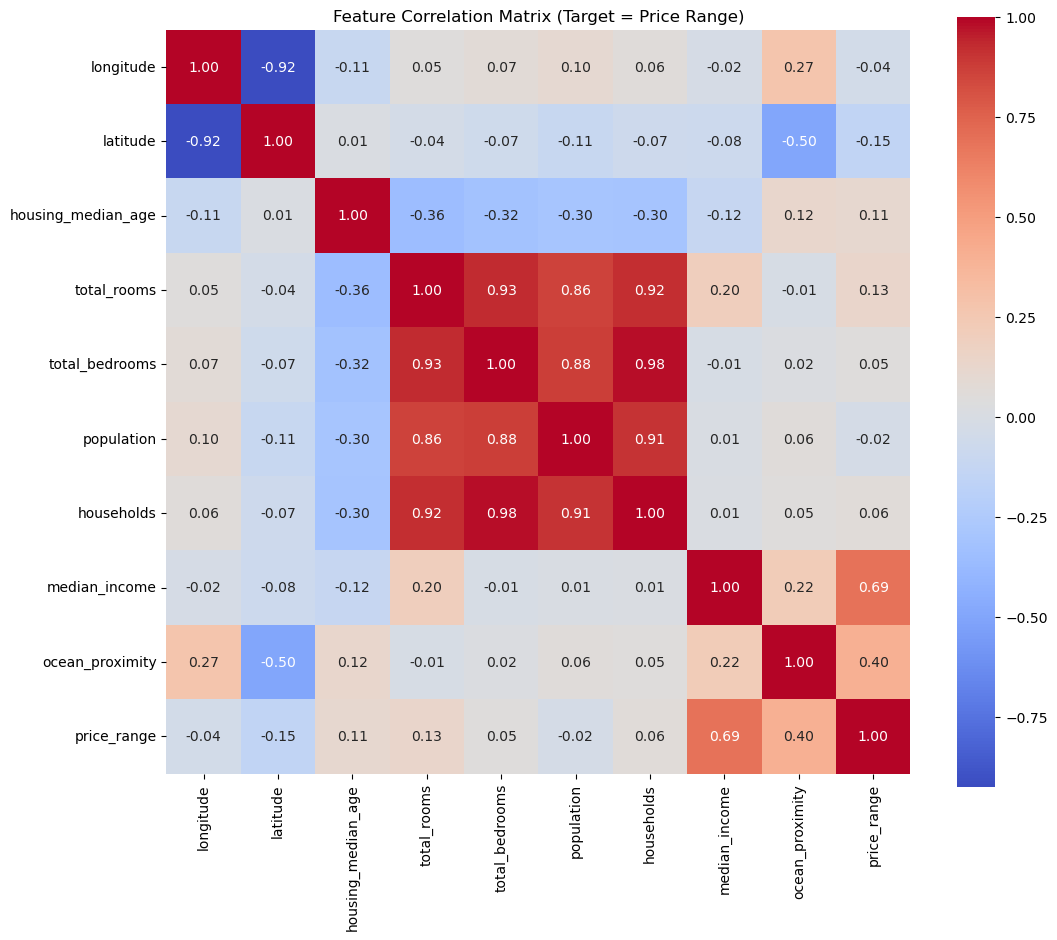

Highly Correlated Columns:
latitude and longitude with correlation: -0.9246161131160106
total_bedrooms and total_rooms with correlation: 0.9303795046865031
households and total_rooms with correlation: 0.9189915343453181
households and total_bedrooms with correlation: 0.9797282708045709
households and population with correlation: 0.9071859001744995


In [21]:
# Step 1: Calculate correlation matrix
corr_matrix = housing.corr()

# Step 2: Display the correlation matrix
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Feature Correlation Matrix (Target = Price Range)')
plt.show()

# Identify and print highly correlated feature pairs (e.g., correlation > 0.9 or < -0.9)
threshold = 0.9
high_corr_pairs = []  # To store pairs of highly correlated columns

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname_1 = corr_matrix.columns[i]
            colname_2 = corr_matrix.columns[j]
            high_corr_pairs.append((colname_1, colname_2, corr_matrix.iloc[i, j]))

# Print the high correlation pairs
print("Highly Correlated Columns:")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]} with correlation: {pair[2]}")

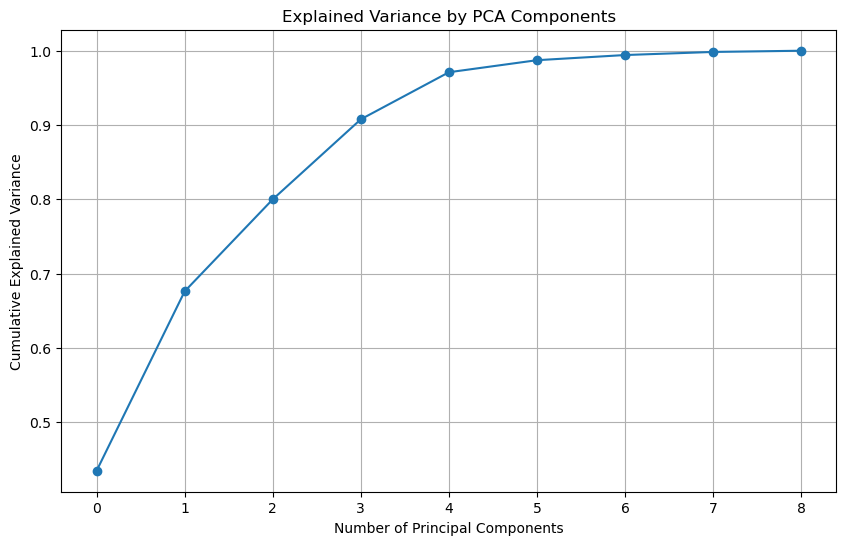

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 2: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 4: Plot explained variance
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()